In [1]:
from projet_final_function import *
import matplotlib.pyplot as plt
from ipyleaflet import Map
from ipyleaflet import basemaps, basemap_to_tiles
from ipyleaflet import Marker, LayerGroup
import pandas as pd

/Users/dorianfitton/opt/anaconda3/envs/bgd/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/Users/dorianfitton/opt/anaconda3/envs/bgd/lib/python3.10/site-packages/xlwings/pro/utils.py:148: UserWarning: Your license key expires in 25 days.
  warnings.warn(


In [2]:
df_complet = pd.read_csv('/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/Rendu/dataset_complet').drop('Unnamed: 0.1', axis=1)
df_complet

,Rang,Heure FR,Latitude,Longitude,Depuis 30 minutes - Cap,Depuis 30 minutes - Vitesse,Depuis 30 minutes - VMG,Depuis 30 minutes - Distance,Depuis le dernier classement - Cap,Depuis le dernier classement - Vitesse,...,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
0,25.0,04:30 FR,46.713500,-2.432000,128.0,11.4,11.3,1.0,115.0,8.9,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270,580
1,25.0,21:30 FR,47.140667,-3.815000,107.0,8.7,8.6,4.4,94.0,9.1,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270,580
2,25.0,17:30 FR,47.182167,-4.706000,94.0,10.0,9.7,5.0,94.0,8.7,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270,580
3,25.0,14:30 FR,47.213667,-5.344833,106.0,6.7,6.7,3.4,69.0,3.5,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270,580
4,25.0,11:30 FR,47.151833,-5.585167,19.0,5.7,0.5,2.8,28.0,7.6,...,06 Août 2007,18.28,5.8,4.5,8.5,2,28.0,acier,270,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15220,6.0,18:00 FR,45.457167,-9.289500,209.0,13.7,13.6,6.9,212.0,11.2,...,15 Mai 2020,18.28,5.7,4.5,7.9,foils,27.3,NaN,270,535
15221,6.0,15:00 FR,45.930167,-8.861333,206.0,10.6,10.6,5.3,196.0,8.7,...,15 Mai 2020,18.28,5.7,4.5,7.9,foils,27.3,NaN,270,535
15222,4.0,12:00 FR,46.346167,-8.685833,182.0,11.2,10.5,5.6,188.0,11.4,...,15 Mai 2020,18.28,5.7,4.5,7.9,foils,27.3,NaN,270,535
15223,19.0,09:00 FR,46.910167,-8.574833,281.0,7.6,1.5,3.8,299.0,13.8,...,15 Mai 2020,18.28,5.7,4.5,7.9,foils,27.3,NaN,270,535


In [3]:
abandons = ['Sebastien Destremau', 'Isabelle Joschke', 'Fabrice Amedeo', 'Samantha Davies', 'Sebastien Simon', 'Alex Thomson', 'Kevin Escoffier', 'Nicolas Troussel']

In [4]:
df_arrived = df_complet[~df_complet.isin(abandons).any(axis=1)].groupby('Skipper')['Date'].max().reset_index()
df_arrived['Rang'] =df_arrived['Date'].rank()
df_arrived

,Skipper,Date,Rang
0,Alan Roura,2021-02-11 14:00:00,17.0
1,Alexia Barrier,2021-02-27 21:00:00,24.0
2,Ari Huusela,2021-03-05 04:00:00,25.0
3,Armel Tripon,2021-01-31 21:00:00,11.0
4,Arnaud Boissieres,2021-02-11 04:00:00,15.0
5,Benjamin Dutreux,2021-01-29 04:00:00,9.0
6,Boris Herrmann,2021-01-28 04:00:00,5.0
7,Charlie Dalin,2021-01-27 14:00:00,1.0
8,Clarisse Cremer,2021-02-03 11:00:00,12.0
9,Clement Giraud,2021-02-16 04:00:00,21.0


In [5]:
test=df_complet.loc[df_complet['Skipper']== 'Charlie Dalin']
test=test.sort_values('Date', ascending=True)

Text(0.5, 1.0, 'Rang du Skipper en fonction du temps')

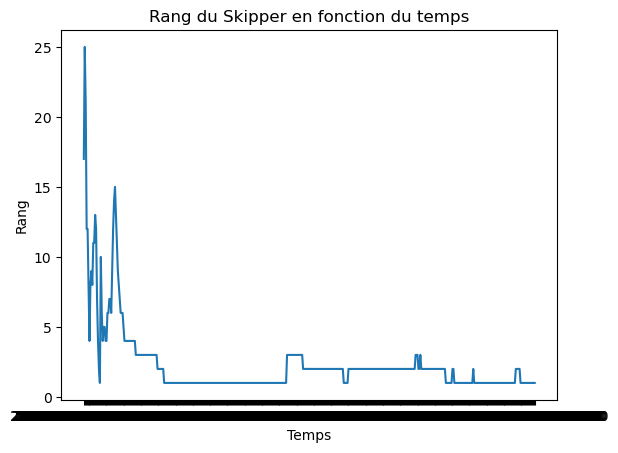

In [6]:
plt.plot(test['Date'].sort_values(ascending=False),test['Rang'])
plt.xlabel('Temps')
plt.ylabel('Rang')
plt.title('Rang du Skipper en fonction du temps')

Calcul de la corrélation:

In [7]:
df_complet.groupby('Skipper')['Rang'].mean()

Skipper
Alan Roura              16.408056
Alex Thomson             7.519737
Alexia Barrier          24.787743
Ari Huusela             25.927143
Armel Tripon            16.096647
Arnaud Boissieres       17.426056
Benjamin Dutreux         7.436735
Boris Herrmann           6.946281
Charlie Dalin            2.278586
Clarisse Cremer         13.444444
Clement Giraud          24.290970
Damien Seguin            6.292784
Didac Costa             19.922813
Fabrice Amedeo          27.122449
Giancarlo Pedote        10.367010
Isabelle Joschke        11.416000
Jean Le Cam              5.562628
Jeremie Beyou           21.572491
Kevin Escoffier          5.661654
Kojiro Shiraishi        22.126316
Louis Burton             6.813278
Manuel Cousin           21.281804
Maxime Sorel            10.640404
Miranda Merron          23.495066
Nicolas Troussel         7.152174
Pip Hare                19.184991
Romain Attanasio        13.374074
Samantha Davies         10.314465
Sebastien Destremau     27.894231
Sebast

In [8]:
df_complet.groupby('Skipper')['Depuis le dernier classement - VMG'].mean()

Skipper
Alan Roura              10.776357
Alex Thomson            11.073684
Alexia Barrier           9.204783
Ari Huusela              8.716000
Armel Tripon            12.091716
Arnaud Boissieres       10.829225
Benjamin Dutreux        12.550816
Boris Herrmann          12.769835
Charlie Dalin           12.815177
Clarisse Cremer         11.803065
Clement Giraud          10.203177
Damien Seguin           12.694433
Didac Costa             10.462607
Fabrice Amedeo           8.631633
Giancarlo Pedote        12.686186
Isabelle Joschke        12.408800
Jean Le Cam             12.552567
Jeremie Beyou           11.401673
Kevin Escoffier         12.263910
Kojiro Shiraishi        10.718947
Louis Burton            12.848340
Manuel Cousin            9.794525
Maxime Sorel            12.358384
Miranda Merron          10.025658
Nicolas Troussel         9.589130
Pip Hare                10.660733
Romain Attanasio        11.330741
Samantha Davies         10.584906
Sebastien Destremau      7.944231
Sebast

In [9]:
np.corrcoef(df_complet.groupby('Skipper')['Rang'].mean().values, df_complet.groupby('Skipper')['Depuis 30 minutes - Distance'].mean().values)

array([[ 1.       , -0.8981797],
       [-0.8981797,  1.       ]])

On a une corrélation très forte (-0.89) entre le rang moyen des skipper et la vitesse utile. La coefficient étant négatif, plus la vitesse est élevée, plus la valeur du rang est basse. Donc plus le skipper va aller vite, plus il se rapprochera du rang 1 (ce qui est logique).

Impact de la présence d'un foil sur le classement et la vitesse des voiliers

In [10]:
info_voilier = pd.read_csv('/Users/dorianfitton/Documents/Cours_Télécom/Kit BIG DATA/kit_bgd/projet_final/Rendu/infos_voiliers')

In [11]:
df_foil_rang_vmg = df_complet.groupby('Skipper')['Rang', 'Depuis le dernier classement - VMG'].mean().reset_index()
df_foil_rang_vmg

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_14521/2437721254.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_foil_rang_vmg = df_complet.groupby('Skipper')['Rang', 'Depuis le dernier classement - VMG'].mean().reset_index()


,Skipper,Rang,Depuis le dernier classement - VMG
0,Alan Roura,16.408056,10.776357
1,Alex Thomson,7.519737,11.073684
2,Alexia Barrier,24.787743,9.204783
3,Ari Huusela,25.927143,8.716000
4,Armel Tripon,16.096647,12.091716
5,Arnaud Boissieres,17.426056,10.829225
6,Benjamin Dutreux,7.436735,12.550816
7,Boris Herrmann,6.946281,12.769835
8,Charlie Dalin,2.278586,12.815177
9,Clarisse Cremer,13.444444,11.803065


In [12]:
df_foil_rang_vmg['Derives']=df_foil_rang_vmg['Skipper'].apply(lambda x: info_voilier['Nombre de dérives'].loc[info_voilier['Skipper']==x].iloc[0])

In [13]:
df_foil_rang_vmg

,Skipper,Rang,Depuis le dernier classement - VMG,Derives
0,Alan Roura,16.408056,10.776357,foils
1,Alex Thomson,7.519737,11.073684,foils
2,Alexia Barrier,24.787743,9.204783,2
3,Ari Huusela,25.927143,8.716000,2
4,Armel Tripon,16.096647,12.091716,foils
5,Arnaud Boissieres,17.426056,10.829225,foils
6,Benjamin Dutreux,7.436735,12.550816,2
7,Boris Herrmann,6.946281,12.769835,foils
8,Charlie Dalin,2.278586,12.815177,foils
9,Clarisse Cremer,13.444444,11.803065,2


In [14]:
map_derives = {' foils' : 'foil', ' foiler' : 'foil',' 2' : '2',' 2 asymétriques':'2 asymétriques'}

In [15]:
df_foil_rang_vmg['Derives']=df_foil_rang_vmg['Derives'].map(map_derives)

In [16]:
df_foil_rang_vmg.groupby('Derives')['Rang'].mean()

Derives
2                 17.096464
2 asymétriques    21.281804
foil              11.849964
Name: Rang, dtype: float64

In [17]:
df_foil_rang_vmg.groupby('Derives')['Depuis le dernier classement - VMG'].mean()

Derives
2                 10.808246
2 asymétriques     9.794525
foil              11.529941
Name: Depuis le dernier classement - VMG, dtype: float64

In [18]:
df_foil_dist = df_complet.groupby('Skipper')['Rang', 'Depuis le dernier classement - VMG'].mean().reset_index()

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_14521/33264316.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_foil_dist = df_complet.groupby('Skipper')['Rang', 'Depuis le dernier classement - VMG'].mean().reset_index()


In [19]:
df_foil_rang_vmg['Abandon']=df_foil_rang_vmg['Skipper'].apply(lambda x: x in abandons)
df_foil_rang_without_abandon = df_foil_rang_vmg.loc[df_foil_rang_vmg['Abandon']==False].drop('Abandon', axis=1)

In [20]:
df_foil_rang_without_abandon

,Skipper,Rang,Depuis le dernier classement - VMG,Derives
0,Alan Roura,16.408056,10.776357,foil
2,Alexia Barrier,24.787743,9.204783,2
3,Ari Huusela,25.927143,8.716000,2
4,Armel Tripon,16.096647,12.091716,foil
5,Arnaud Boissieres,17.426056,10.829225,foil
6,Benjamin Dutreux,7.436735,12.550816,2
7,Boris Herrmann,6.946281,12.769835,foil
8,Charlie Dalin,2.278586,12.815177,foil
9,Clarisse Cremer,13.444444,11.803065,2
10,Clement Giraud,24.290970,10.203177,2


In [21]:
df_foil_rang_without_abandon['Rang_final'] = df_foil_rang_without_abandon['Skipper'].apply(lambda x: df_arrived['Rang'].loc[df_arrived['Skipper']==x].iloc[0])

In [22]:
df_foil_rang_without_abandon

,Skipper,Rang,Depuis le dernier classement - VMG,Derives,Rang_final
0,Alan Roura,16.408056,10.776357,foil,17.0
2,Alexia Barrier,24.787743,9.204783,2,24.0
3,Ari Huusela,25.927143,8.716000,2,25.0
4,Armel Tripon,16.096647,12.091716,foil,11.0
5,Arnaud Boissieres,17.426056,10.829225,foil,15.0
6,Benjamin Dutreux,7.436735,12.550816,2,9.0
7,Boris Herrmann,6.946281,12.769835,foil,5.0
8,Charlie Dalin,2.278586,12.815177,foil,1.0
9,Clarisse Cremer,13.444444,11.803065,2,12.0
10,Clement Giraud,24.290970,10.203177,2,21.0


In [23]:
df_foil_rang_without_abandon.groupby('Derives')['Rang_final'].mean()

Derives
2                 15.875000
2 asymétriques    23.000000
foil               9.291667
Name: Rang_final, dtype: float64

On remarque que la présence d'un foil a un gros impact positif sur le classement moyen et la vitesse des skippers. La différence est environ la même si on regardre le classement final.

Distance parcourue par les skipper

In [24]:
df_complet.groupby('Skipper')['Date'].max().sort_values()

Skipper
Nicolas Troussel        2020-11-16 14:00:00
Kevin Escoffier         2020-12-01 04:00:00
Alex Thomson            2020-12-04 08:00:00
Sebastien Simon         2020-12-04 14:00:00
Samantha Davies         2020-12-05 11:00:00
Fabrice Amedeo          2020-12-11 14:00:00
Isabelle Joschke        2021-01-09 21:00:00
Sebastien Destremau     2021-01-16 17:00:00
Charlie Dalin           2021-01-27 14:00:00
Yannick Bestaven        2021-01-27 17:00:00
Louis Burton            2021-01-27 17:00:00
Thomas Ruyant           2021-01-27 21:00:00
Boris Herrmann          2021-01-28 04:00:00
Damien Seguin           2021-01-28 08:00:00
Giancarlo Pedote        2021-01-28 08:00:00
Jean Le Cam             2021-01-28 14:00:00
Benjamin Dutreux        2021-01-29 04:00:00
Maxime Sorel            2021-01-29 21:00:00
Armel Tripon            2021-01-31 21:00:00
Clarisse Cremer         2021-02-03 11:00:00
Jeremie Beyou           2021-02-06 04:00:00
Romain Attanasio        2021-02-06 11:00:00
Arnaud Boissieres       

In [25]:
df_distances = df_complet.groupby('Skipper')['Depuis le dernier classement - Distance'].sum().reset_index()
df_distances

,Skipper,Depuis le dernier classement - Distance
0,Alan Roura,28160.3
1,Alex Thomson,8210.9
2,Alexia Barrier,27574.0
3,Ari Huusela,28616.9
4,Armel Tripon,27668.0
5,Arnaud Boissieres,28059.6
6,Benjamin Dutreux,27397.0
7,Boris Herrmann,27758.6
8,Charlie Dalin,28284.2
9,Clarisse Cremer,27215.2


In [26]:
df_distances['Abandon']=df_distances['Skipper'].apply(lambda x: x in abandons)


In [27]:
df_without_abandon = df_distances.loc[df_distances['Abandon']==False].drop('Abandon', axis=1)

In [28]:
df_without_abandon['Rang'] = df_without_abandon['Skipper'].apply(lambda x: df_arrived['Rang'].loc[df_arrived['Skipper']==x].iloc[0])

In [29]:
df_without_abandon.sort_values('Rang')

,Skipper,Depuis le dernier classement - Distance,Rang
8,Charlie Dalin,28284.2,1.0
32,Yannick Bestaven,27660.6,2.5
20,Louis Burton,27896.2,2.5
31,Thomas Ruyant,28195.6,4.0
7,Boris Herrmann,27758.6,5.0
11,Damien Seguin,27061.7,6.5
14,Giancarlo Pedote,27617.8,6.5
16,Jean Le Cam,27013.9,8.0
6,Benjamin Dutreux,27397.0,9.0
22,Maxime Sorel,26879.4,10.0


<AxesSubplot:xlabel='Skipper'>

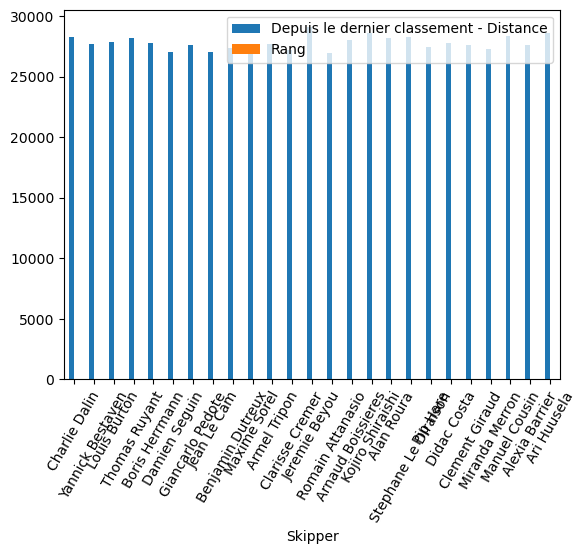

In [30]:
df_without_abandon.sort_values('Rang').set_index('Skipper').plot(kind='bar', rot=60)

Affichage le parcours des skippers lors de la course

In [37]:
Yannick_Bestaven=df_complet.loc[df_complet['Skipper']== 'Yannick Bestaven'].sort_values('Date')
geo_p_Yannick_Bestaven = Yannick_Bestaven[['Latitude', 'Longitude', 'Date']]

In [38]:
geo_p_Yannick_Bestaven

,Latitude,Longitude,Date
13112,46.246667,-6.652667,2020-11-09 04:00:00
13111,46.450833,-7.633500,2020-11-09 08:00:00
13110,46.410667,-8.075000,2020-11-09 11:00:00
13109,46.003333,-8.294000,2020-11-09 14:00:00
13108,45.599333,-8.697000,2020-11-09 17:00:00
...,...,...,...
12635,47.874000,-12.467000,2021-01-27 04:00:00
12634,47.889500,-10.551833,2021-01-27 08:00:00
12633,47.843500,-9.317167,2021-01-27 11:00:00
12632,47.723000,-7.980167,2021-01-27 14:00:00


In [39]:
watercolor = basemap_to_tiles(basemaps.Stamen.Terrain)
m = Map(layers=(watercolor, ), center=(50, 50), zoom=1)

df2 = geo_p_Yannick_Bestaven
layers = []
j=0
for i, row in df2.iterrows():
    #print(row)
    marker = Marker(location=(row['Latitude'], row['Longitude']),
                    draggable=True,
                    title=str(row['Date']))
    layers.append(marker)
    j= j+1
    #print(j)
layer_group = LayerGroup(layers=layers)
m.add_layer(layer_group)

/Users/dorianfitton/opt/anaconda3/envs/bgd/lib/python3.10/site-packages/jupyter_client/session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [40]:
m

Map(center=[50, 50], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

LayerGroup(layers=(Marker(draggable=False, location=[46.24666666666667, -6.652666666666667], options=['alt', '…